In [1]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=8000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


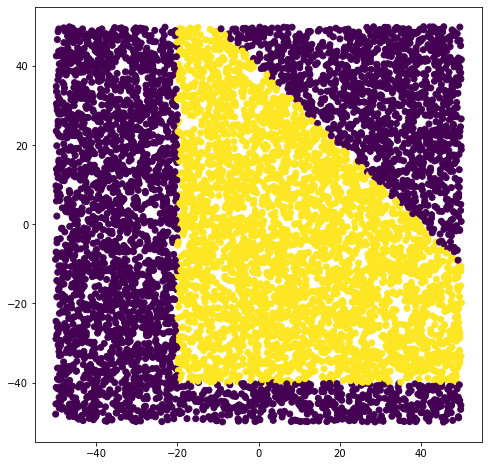

In [2]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 8000
train: 6400


<function matplotlib.pyplot.show(close=None, block=None)>

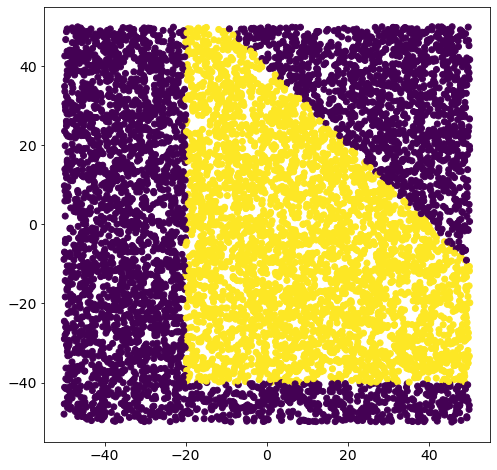

In [4]:
#keras work with numpy arrays: just use them from the start
TYPE=1
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [5]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 6400 	 Validation: 1600


In [6]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.10192729 -1.03055499]
 [ 0.22516501  0.3213575 ]
 [ 1.59714977  0.52063386]
 ...
 [-1.20475364 -1.44757585]
 [-0.57680258 -0.24647348]
 [ 1.30843567  0.53900453]]


In [7]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 25)                75        
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 25)                650       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 25)                650       
                                                                 
 dense_6 (Dense)             (None, 25)                6

In [8]:
model.compile(loss='binary_crossentropy',
               optimizer="RMSprop",
               #optimizer='adam',
               metrics=['accuracy'])

In [9]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
72/72 - 1s - loss: 0.5339 - accuracy: 0.7578 - val_loss: 0.3867 - val_accuracy: 0.8506 - 1s/epoch - 19ms/step
Epoch 2/500
72/72 - 0s - loss: 0.3714 - accuracy: 0.8516 - val_loss: 0.3099 - val_accuracy: 0.8644 - 171ms/epoch - 2ms/step
Epoch 3/500
72/72 - 0s - loss: 0.2953 - accuracy: 0.8717 - val_loss: 0.2293 - val_accuracy: 0.8969 - 172ms/epoch - 2ms/step
Epoch 4/500
72/72 - 0s - loss: 0.2379 - accuracy: 0.8831 - val_loss: 0.1922 - val_accuracy: 0.9100 - 167ms/epoch - 2ms/step
Epoch 5/500
72/72 - 0s - loss: 0.1959 - accuracy: 0.9064 - val_loss: 0.1566 - val_accuracy: 0.9137 - 173ms/epoch - 2ms/step
Epoch 6/500
72/72 - 0s - loss: 0.1623 - accuracy: 0.9237 - val_loss: 0.1780 - val_accuracy: 0.9019 - 174ms/epoch - 2ms/step
Epoch 7/500
72/72 - 0s - loss: 0.1470 - accuracy: 0.9337 - val_loss: 0.2829 - val_accuracy: 0.8687 - 173ms/epoch - 2ms/step
Epoch 8/500
72/72 - 0s - loss: 0.1332 - accuracy: 0.9392 - val_loss: 0.1181 - val_accuracy: 0.9450 - 171ms/epoch - 2ms/step
Epoch 9/50

Epoch 67/500
72/72 - 0s - loss: 0.0467 - accuracy: 0.9794 - val_loss: 0.0389 - val_accuracy: 0.9837 - 173ms/epoch - 2ms/step
Epoch 68/500
72/72 - 0s - loss: 0.0469 - accuracy: 0.9787 - val_loss: 0.0386 - val_accuracy: 0.9825 - 176ms/epoch - 2ms/step
Epoch 69/500
72/72 - 0s - loss: 0.0483 - accuracy: 0.9803 - val_loss: 0.2160 - val_accuracy: 0.9356 - 170ms/epoch - 2ms/step
Epoch 70/500
72/72 - 0s - loss: 0.0446 - accuracy: 0.9828 - val_loss: 0.0325 - val_accuracy: 0.9837 - 171ms/epoch - 2ms/step
Epoch 71/500
72/72 - 0s - loss: 0.0467 - accuracy: 0.9789 - val_loss: 0.0411 - val_accuracy: 0.9794 - 170ms/epoch - 2ms/step
Epoch 72/500
72/72 - 0s - loss: 0.0457 - accuracy: 0.9803 - val_loss: 0.0828 - val_accuracy: 0.9669 - 168ms/epoch - 2ms/step
Epoch 73/500
72/72 - 0s - loss: 0.0435 - accuracy: 0.9816 - val_loss: 0.1288 - val_accuracy: 0.9594 - 168ms/epoch - 2ms/step
Epoch 74/500
72/72 - 0s - loss: 0.0451 - accuracy: 0.9798 - val_loss: 0.0979 - val_accuracy: 0.9588 - 166ms/epoch - 2ms/step


Epoch 133/500
72/72 - 0s - loss: 0.0387 - accuracy: 0.9837 - val_loss: 0.0399 - val_accuracy: 0.9844 - 172ms/epoch - 2ms/step
Epoch 134/500
72/72 - 0s - loss: 0.0356 - accuracy: 0.9848 - val_loss: 0.0646 - val_accuracy: 0.9756 - 171ms/epoch - 2ms/step
Epoch 135/500
72/72 - 0s - loss: 0.0343 - accuracy: 0.9858 - val_loss: 0.1159 - val_accuracy: 0.9638 - 172ms/epoch - 2ms/step
Epoch 136/500
72/72 - 0s - loss: 0.0384 - accuracy: 0.9836 - val_loss: 0.0481 - val_accuracy: 0.9800 - 169ms/epoch - 2ms/step
Epoch 137/500
72/72 - 0s - loss: 0.0326 - accuracy: 0.9859 - val_loss: 0.0456 - val_accuracy: 0.9794 - 171ms/epoch - 2ms/step
Epoch 138/500
72/72 - 0s - loss: 0.0367 - accuracy: 0.9834 - val_loss: 0.0322 - val_accuracy: 0.9831 - 173ms/epoch - 2ms/step
Epoch 139/500
72/72 - 0s - loss: 0.0373 - accuracy: 0.9837 - val_loss: 0.0286 - val_accuracy: 0.9869 - 172ms/epoch - 2ms/step
Epoch 140/500
72/72 - 0s - loss: 0.0358 - accuracy: 0.9855 - val_loss: 0.0301 - val_accuracy: 0.9900 - 176ms/epoch - 2

72/72 - 0s - loss: 0.0317 - accuracy: 0.9866 - val_loss: 0.0508 - val_accuracy: 0.9756 - 170ms/epoch - 2ms/step
Epoch 199/500
72/72 - 0s - loss: 0.0312 - accuracy: 0.9858 - val_loss: 0.0217 - val_accuracy: 0.9919 - 167ms/epoch - 2ms/step
Epoch 200/500
72/72 - 0s - loss: 0.0318 - accuracy: 0.9866 - val_loss: 0.0249 - val_accuracy: 0.9875 - 175ms/epoch - 2ms/step
Epoch 201/500
72/72 - 0s - loss: 0.0327 - accuracy: 0.9861 - val_loss: 0.0928 - val_accuracy: 0.9712 - 167ms/epoch - 2ms/step
Epoch 202/500
72/72 - 0s - loss: 0.0315 - accuracy: 0.9861 - val_loss: 0.0250 - val_accuracy: 0.9912 - 174ms/epoch - 2ms/step
Epoch 203/500
72/72 - 0s - loss: 0.0317 - accuracy: 0.9856 - val_loss: 0.0849 - val_accuracy: 0.9725 - 175ms/epoch - 2ms/step
Epoch 204/500
72/72 - 0s - loss: 0.0308 - accuracy: 0.9858 - val_loss: 0.0253 - val_accuracy: 0.9881 - 168ms/epoch - 2ms/step
Epoch 205/500
72/72 - 0s - loss: 0.0293 - accuracy: 0.9872 - val_loss: 0.0309 - val_accuracy: 0.9887 - 173ms/epoch - 2ms/step
Epoch 

Epoch 264/500
72/72 - 0s - loss: 0.0255 - accuracy: 0.9883 - val_loss: 0.0566 - val_accuracy: 0.9806 - 174ms/epoch - 2ms/step
Epoch 265/500
72/72 - 0s - loss: 0.0295 - accuracy: 0.9881 - val_loss: 0.0291 - val_accuracy: 0.9850 - 173ms/epoch - 2ms/step
Epoch 266/500
72/72 - 0s - loss: 0.0270 - accuracy: 0.9883 - val_loss: 0.0332 - val_accuracy: 0.9856 - 170ms/epoch - 2ms/step
Epoch 267/500
72/72 - 0s - loss: 0.0269 - accuracy: 0.9897 - val_loss: 0.0366 - val_accuracy: 0.9825 - 177ms/epoch - 2ms/step
Epoch 268/500
72/72 - 0s - loss: 0.0265 - accuracy: 0.9892 - val_loss: 0.0956 - val_accuracy: 0.9737 - 170ms/epoch - 2ms/step
Epoch 269/500
72/72 - 0s - loss: 0.0268 - accuracy: 0.9880 - val_loss: 0.0336 - val_accuracy: 0.9862 - 173ms/epoch - 2ms/step
Epoch 270/500
72/72 - 0s - loss: 0.0270 - accuracy: 0.9878 - val_loss: 0.0256 - val_accuracy: 0.9881 - 172ms/epoch - 2ms/step
Epoch 271/500
72/72 - 0s - loss: 0.0268 - accuracy: 0.9887 - val_loss: 0.0269 - val_accuracy: 0.9862 - 174ms/epoch - 2

72/72 - 0s - loss: 0.0255 - accuracy: 0.9903 - val_loss: 0.0206 - val_accuracy: 0.9937 - 170ms/epoch - 2ms/step
Epoch 330/500
72/72 - 0s - loss: 0.0243 - accuracy: 0.9898 - val_loss: 0.0185 - val_accuracy: 0.9906 - 174ms/epoch - 2ms/step
Epoch 331/500
72/72 - 0s - loss: 0.0263 - accuracy: 0.9884 - val_loss: 0.0456 - val_accuracy: 0.9837 - 171ms/epoch - 2ms/step
Epoch 332/500
72/72 - 0s - loss: 0.0247 - accuracy: 0.9892 - val_loss: 0.0296 - val_accuracy: 0.9887 - 170ms/epoch - 2ms/step
Epoch 333/500
72/72 - 0s - loss: 0.0254 - accuracy: 0.9891 - val_loss: 0.0341 - val_accuracy: 0.9875 - 244ms/epoch - 3ms/step
Epoch 334/500
72/72 - 0s - loss: 0.0274 - accuracy: 0.9878 - val_loss: 0.0263 - val_accuracy: 0.9850 - 176ms/epoch - 2ms/step
Epoch 335/500
72/72 - 0s - loss: 0.0257 - accuracy: 0.9897 - val_loss: 0.0292 - val_accuracy: 0.9844 - 172ms/epoch - 2ms/step
Epoch 336/500
72/72 - 0s - loss: 0.0250 - accuracy: 0.9889 - val_loss: 0.0841 - val_accuracy: 0.9731 - 174ms/epoch - 2ms/step
Epoch 

Epoch 395/500
72/72 - 0s - loss: 0.0225 - accuracy: 0.9903 - val_loss: 0.0732 - val_accuracy: 0.9806 - 176ms/epoch - 2ms/step
Epoch 396/500
72/72 - 0s - loss: 0.0229 - accuracy: 0.9906 - val_loss: 0.0203 - val_accuracy: 0.9894 - 172ms/epoch - 2ms/step
Epoch 397/500
72/72 - 0s - loss: 0.0231 - accuracy: 0.9900 - val_loss: 0.0461 - val_accuracy: 0.9800 - 176ms/epoch - 2ms/step
Epoch 398/500
72/72 - 0s - loss: 0.0250 - accuracy: 0.9898 - val_loss: 0.0296 - val_accuracy: 0.9844 - 174ms/epoch - 2ms/step
Epoch 399/500
72/72 - 0s - loss: 0.0256 - accuracy: 0.9884 - val_loss: 0.0234 - val_accuracy: 0.9887 - 175ms/epoch - 2ms/step
Epoch 400/500
72/72 - 0s - loss: 0.0237 - accuracy: 0.9898 - val_loss: 0.0193 - val_accuracy: 0.9925 - 178ms/epoch - 2ms/step
Epoch 401/500
72/72 - 0s - loss: 0.0240 - accuracy: 0.9891 - val_loss: 0.0204 - val_accuracy: 0.9894 - 174ms/epoch - 2ms/step
Epoch 402/500
72/72 - 0s - loss: 0.0225 - accuracy: 0.9895 - val_loss: 0.0234 - val_accuracy: 0.9912 - 178ms/epoch - 2

72/72 - 0s - loss: 0.0238 - accuracy: 0.9905 - val_loss: 0.0391 - val_accuracy: 0.9850 - 174ms/epoch - 2ms/step
Epoch 461/500
72/72 - 0s - loss: 0.0220 - accuracy: 0.9908 - val_loss: 0.0218 - val_accuracy: 0.9919 - 175ms/epoch - 2ms/step
Epoch 462/500
72/72 - 0s - loss: 0.0219 - accuracy: 0.9905 - val_loss: 0.0200 - val_accuracy: 0.9919 - 173ms/epoch - 2ms/step
Epoch 463/500
72/72 - 0s - loss: 0.0212 - accuracy: 0.9906 - val_loss: 0.0968 - val_accuracy: 0.9756 - 176ms/epoch - 2ms/step
Epoch 464/500
72/72 - 0s - loss: 0.0233 - accuracy: 0.9909 - val_loss: 0.0205 - val_accuracy: 0.9887 - 175ms/epoch - 2ms/step
Epoch 465/500
72/72 - 0s - loss: 0.0223 - accuracy: 0.9891 - val_loss: 0.0184 - val_accuracy: 0.9900 - 179ms/epoch - 2ms/step
Epoch 466/500
72/72 - 0s - loss: 0.0233 - accuracy: 0.9902 - val_loss: 0.0407 - val_accuracy: 0.9819 - 169ms/epoch - 2ms/step
Epoch 467/500
72/72 - 0s - loss: 0.0216 - accuracy: 0.9905 - val_loss: 0.0274 - val_accuracy: 0.9881 - 173ms/epoch - 2ms/step
Epoch 

[0.021052716299891472, 0.037266626954078674]


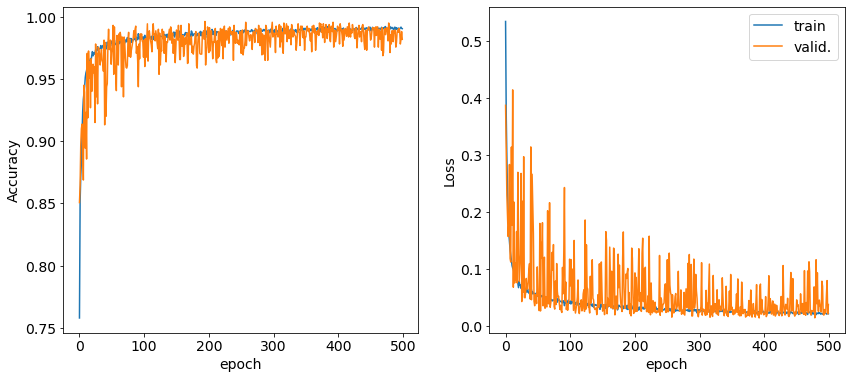

In [10]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
a=[]
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)
plt.savefig('LC_1F_2G_8.png')

In [11]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
print(grid_r)
pred = model.predict(grid_r)

51 2601
[50. 50.]
[[-1.71975476 -1.71975476]
 [-1.65096457 -1.71975476]
 [-1.58217438 -1.71975476]
 ...
 [ 1.58217438  1.71975476]
 [ 1.65096457  1.71975476]
 [ 1.71975476  1.71975476]]


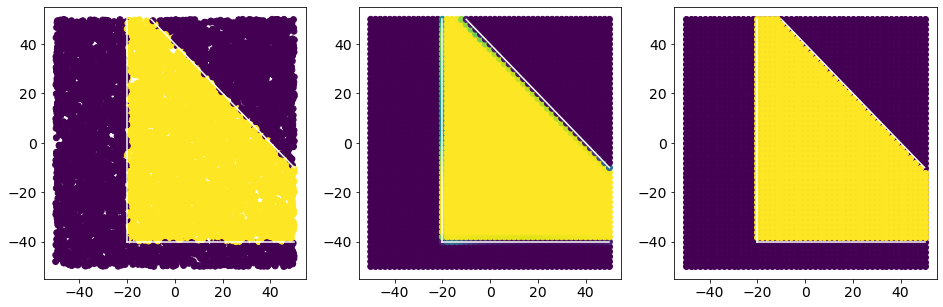

In [12]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('1F_2G_8.png')